In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [ ]:
X, y =   make_blobs(n_samples=2000, n_features=3, cluster_std=5.5, random_state=42)
data= make_blobs(n_samples=2000, n_features=3, cluster_std=5.5, random_state=42)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


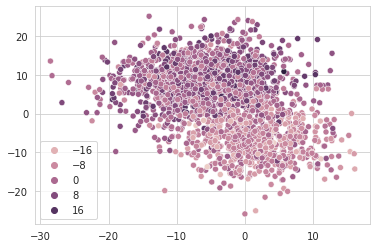

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(X.T[0], X.T[1],X.T[2])

In [ ]:
df.isna().sum()

x        0
y        0
label    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


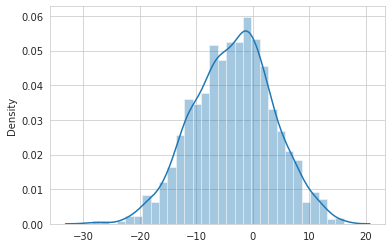

In [ ]:
sns.distplot(X.T[0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


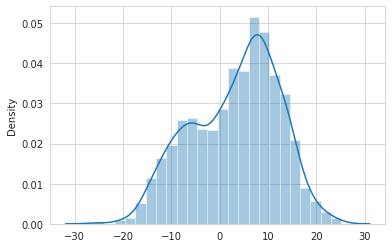

In [ ]:
sns.distplot(X.T[1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


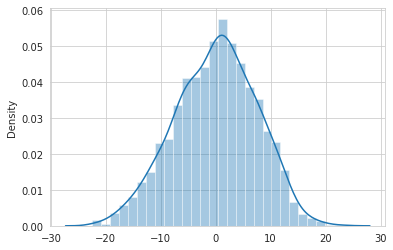

In [ ]:
sns.distplot(X.T[2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8135714285714286
Accuracy of test: 0.7533333333333333



Bias for training = 1-0.8135714285714286. = 0.186428571   
Bias for test = 1-0.7533333333333333 = 0.246666666

Variance = test bias - training bias = 0.060238095   
high variance high bias 

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X_train)
#X_train_n = scaler.transform(X_train)
#X_test_n = scaler.transform(X_test)

In [ ]:
#clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#clf.fit(X_train,y_train)
#print("Accuracy of train:",clf.score(X_train_n,y_train))
#print("Accuracy of test:",clf.score(X_test_n,y_test))

#i didnt do any scaling because there is not that much change in score maybe outlier detection can be done but out data graph seems clear.

Accuracy of train: 0.8107142857142857
Accuracy of test: 0.76


In [60]:
clf_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_2.fit(X_train,y_train)
print("Accuracy of train:",clf_2.score(X_train,y_train))
print("Accuracy of test:",clf_2.score(X_test,y_test))

Accuracy of train: 0.8378571428571429
Accuracy of test: 0.785


Bias for training = 1-0.8378571428571429 = 0.1621428571428571   
Bias for test = 1-0.785 = 0.15

Variance = test bias - training bias = 0.0121428571428571

optimum

In [57]:
clf_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_3.fit(X_train,y_train)
print("Accuracy of train:",clf_3.score(X_train,y_train))
print("Accuracy of test:",clf_3.score(X_test,y_test))

Accuracy of train: 0.7935714285714286
Accuracy of test: 0.72


Bias for training = 1-0.7935714285714286 = 0.2064285714285714  
Bias for test = 1-0.72 = 0.28

Variance = test bias - training bias = 0.0735714285714286  

high bias low variance underfitting

XGBoost

In [67]:
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [68]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[9.8659235e-01, 8.6340884e-04, 1.2544256e-02],
       [2.2105593e-03, 9.7101361e-01, 2.6775818e-02],
       [8.9119679e-01, 2.5023208e-03, 1.0630093e-01],
       [1.9920766e-04, 9.9947399e-01, 3.2679728e-04],
       [8.6302954e-01, 6.1243545e-04, 1.3635804e-01],
       [1.4117282e-02, 5.8032131e-01, 4.0556142e-01],
       [2.2533327e-01, 7.4392869e-03, 7.6722747e-01],
       [7.6712060e-01, 9.5182881e-03, 2.2336109e-01],
       [8.1605268e-01, 1.9255757e-02, 1.6469155e-01],
       [5.3818589e-01, 1.1250804e-03, 4.6068901e-01]], dtype=float32)

In [69]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [70]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7770465170377374
Recall = 0.7798385642135641
Accuracy = 0.7783333333333333


In [80]:
dmatrix_train_ = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param_2 = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 3
model = xgb.train(param, dmatrix_train, num_round)
preds = model.predict(dmatrix_test)

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))



Precision = 0.7770465170377374
Recall = 0.7798385642135641
Accuracy = 0.7783333333333333


In [ ]:
Precision = 0.7770465170377374
Recall = 0.7798385642135641
Accuracy = 0.7783333333333333

In [81]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 210}
Mean of the cv scores is 0.814290
Train Score 0.838571
Test Score 0.786667
Seconds used for refitting the best model on the train dataset: 0.523579
